In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/expanded_bank_customer_churn_8000.csv")

In [ ]:
df = df.drop(columns=["CustomerID", "Gender", "Age", "EstimatedSalary"])

In [ ]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logistic_regression_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', logistic_regression_model),
    ('KNN', knn)
], voting='soft')

In [ ]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.38%


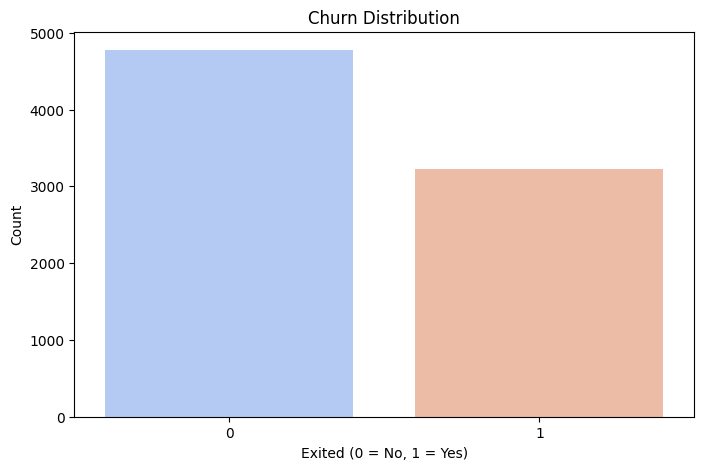

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Exited", data=df, hue="Exited", palette="coolwarm", legend=False)
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2732479400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance_df, palette="viridis", hue=None)


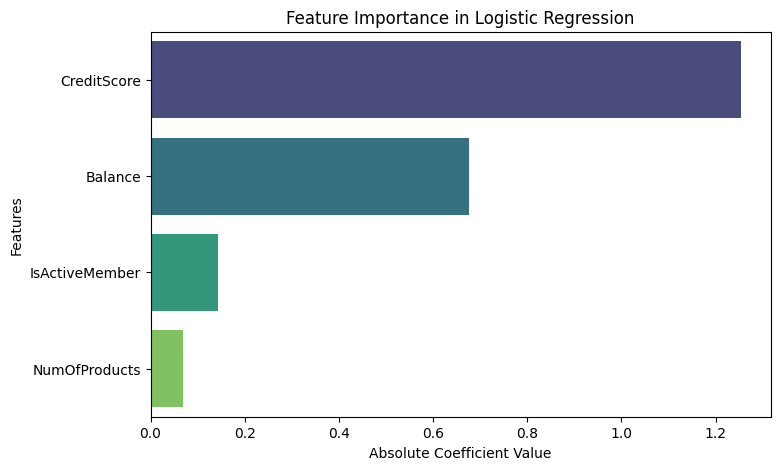

In [ ]:
logistic_regression_model.fit(X_train, y_train)
coefficients = logistic_regression_model.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance_df, palette="viridis", hue=None)
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.show()

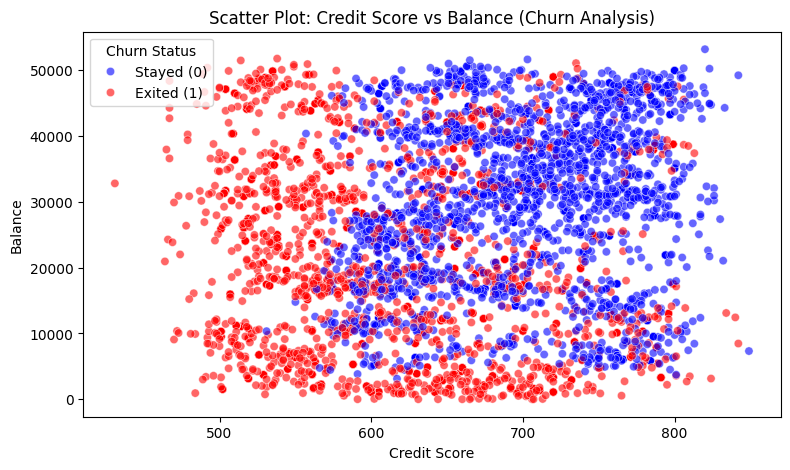

In [ ]:
plt.figure(figsize=(9, 5))
scatter = sns.scatterplot(x=df["CreditScore"], y=df["Balance"], hue=df["Exited"], palette={0: "blue", 1: "red"}, alpha=0.6)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["Stayed (0)", "Exited (1)"], title="Churn Status")
plt.title("Scatter Plot: Credit Score vs Balance (Churn Analysis)")
plt.xlabel("Credit Score")
plt.ylabel("Balance")
plt.show()


In [ ]:
correlation_matrix = X.corr()

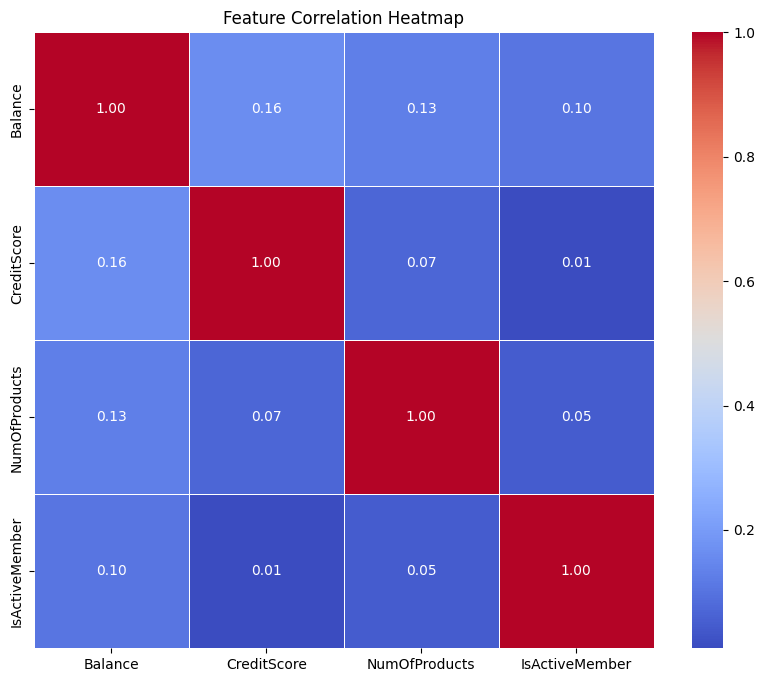

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

/tmp/ipython-input-2398181669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CreditScore', data=df, palette='coolwarm')


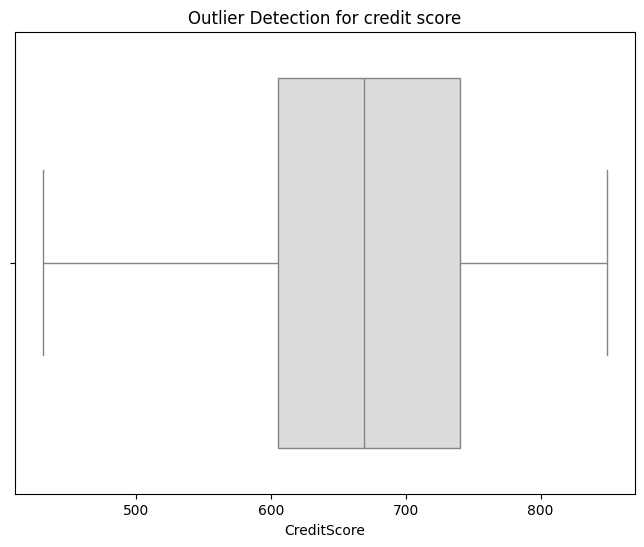

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CreditScore', data=df, palette='coolwarm')
plt.title('Outlier Detection for credit score')
plt.show()

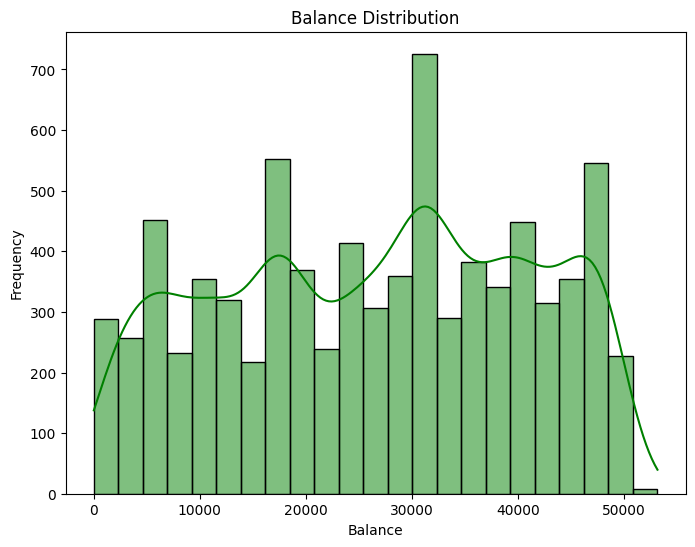

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], kde=True, color='green')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
credit_score_input = widgets.IntText(description="Credit Score:", value=400)
balance_input = widgets.FloatText(description="Balance:", value=200000)
num_of_products_input = widgets.IntText(description="Products:", value=1)
is_active_input = widgets.Dropdown(options=["No", "Yes"], description="Is Active:")
predict_button = widgets.Button(description="Predict")

In [ ]:
output = widgets.Output()

In [ ]:
def on_predict_clicked(b):
    with output:
        output.clear_output()
        cs = credit_score_input.value
        bal = balance_input.value
        prod = num_of_products_input.value
        active = 1 if is_active_input.value == "Yes" else 0

        user_data = np.array([[cs, bal, prod, active]])
        user_data_scaled = scaler.transform(user_data)
        pred = ensemble_model.predict(user_data_scaled)[0]
        proba = ensemble_model.predict_proba(user_data_scaled)[0]

        print(f"Predicted Churn Status (0=Stay, 1=Leave): {pred}")
        print(f"Probability -> Stay: {proba[0]:.2f}, Leave: {proba[1]:.2f}")

In [ ]:
predict_button.on_click(on_predict_clicked)

display(credit_score_input, balance_input, num_of_products_input, is_active_input, predict_button, output)

IntText(value=400, description='Credit Score:')

FloatText(value=200000.0, description='Balance:')

IntText(value=1, description='Products:')

Dropdown(description='Is Active:', options=('No', 'Yes'), value='No')

Button(description='Predict', style=ButtonStyle())

Output()